In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
df = pd.read_csv(r"C:\Users\sarav\Documents\EDA\datasets\eurusd\eurusd_m15.csv")

In [4]:
del df['Unnamed: 0']

In [5]:
df

,time,open,high,low,close,tick_volume,spread,real_volume
0,2012-01-02 00:00:00,1.29443,1.29484,1.29432,1.29459,223,20,0
1,2012-01-02 00:15:00,1.29460,1.29525,1.29419,1.29419,346,19,0
2,2012-01-02 00:30:00,1.29406,1.29488,1.29402,1.29408,342,21,0
3,2012-01-02 00:45:00,1.29408,1.29453,1.29368,1.29429,304,24,0
4,2012-01-02 01:00:00,1.29434,1.29461,1.29405,1.29429,242,20,0
...,...,...,...,...,...,...,...,...
247037,2021-12-30 23:00:00,1.13194,1.13270,1.13194,1.13260,212,0,0
247038,2021-12-30 23:15:00,1.13260,1.13275,1.13259,1.13269,82,0,0
247039,2021-12-30 23:30:00,1.13270,1.13276,1.13240,1.13250,117,0,0
247040,2021-12-30 23:45:00,1.13250,1.13259,1.13246,1.13257,116,0,0


In [6]:
df['SMA10'] = df['close'].rolling(10).mean()
df['SMA20'] = df['close'].rolling(20).mean()

In [10]:
df.isna().sum()

time            0
open            0
high            0
low             0
close           0
tick_volume     0
spread          0
real_volume     0
SMA10           9
SMA20          19
dtype: int64

In [7]:
df['SMA10'].head(20)

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9     1.294261
10    1.294238
11    1.294206
12    1.294155
13    1.294082
14    1.294019
15    1.293913
16    1.293811
17    1.293723
18    1.293592
19    1.293425
Name: SMA10, dtype: float64

In [8]:
df['SMA20'].head(30)

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9          NaN
10         NaN
11         NaN
12         NaN
13         NaN
14         NaN
15         NaN
16         NaN
17         NaN
18         NaN
19    1.293843
20    1.293732
21    1.293659
22    1.293578
23    1.293473
24    1.293379
25    1.293337
26    1.293252
27    1.293198
28    1.293134
29    1.293068
Name: SMA20, dtype: float64

In [11]:
df.dropna()

,time,open,high,low,close,tick_volume,spread,real_volume,SMA10,SMA20
19,2012-01-02 04:45:00,1.29277,1.29340,1.29211,1.29255,356,26,0,1.293425,1.293843
20,2012-01-02 05:00:00,1.29255,1.29278,1.29206,1.29236,327,16,0,1.293225,1.293732
21,2012-01-02 05:15:00,1.29239,1.29280,1.29217,1.29274,251,17,0,1.293112,1.293659
22,2012-01-02 05:30:00,1.29275,1.29277,1.29215,1.29247,268,17,0,1.293002,1.293578
23,2012-01-02 05:45:00,1.29250,1.29260,1.29214,1.29218,180,16,0,1.292864,1.293473
...,...,...,...,...,...,...,...,...,...,...
247037,2021-12-30 23:00:00,1.13194,1.13270,1.13194,1.13260,212,0,0,1.131885,1.131692
247038,2021-12-30 23:15:00,1.13260,1.13275,1.13259,1.13269,82,0,0,1.132094,1.131702
247039,2021-12-30 23:30:00,1.13270,1.13276,1.13240,1.13250,117,0,0,1.132256,1.131715
247040,2021-12-30 23:45:00,1.13250,1.13259,1.13246,1.13257,116,0,0,1.132382,1.131760


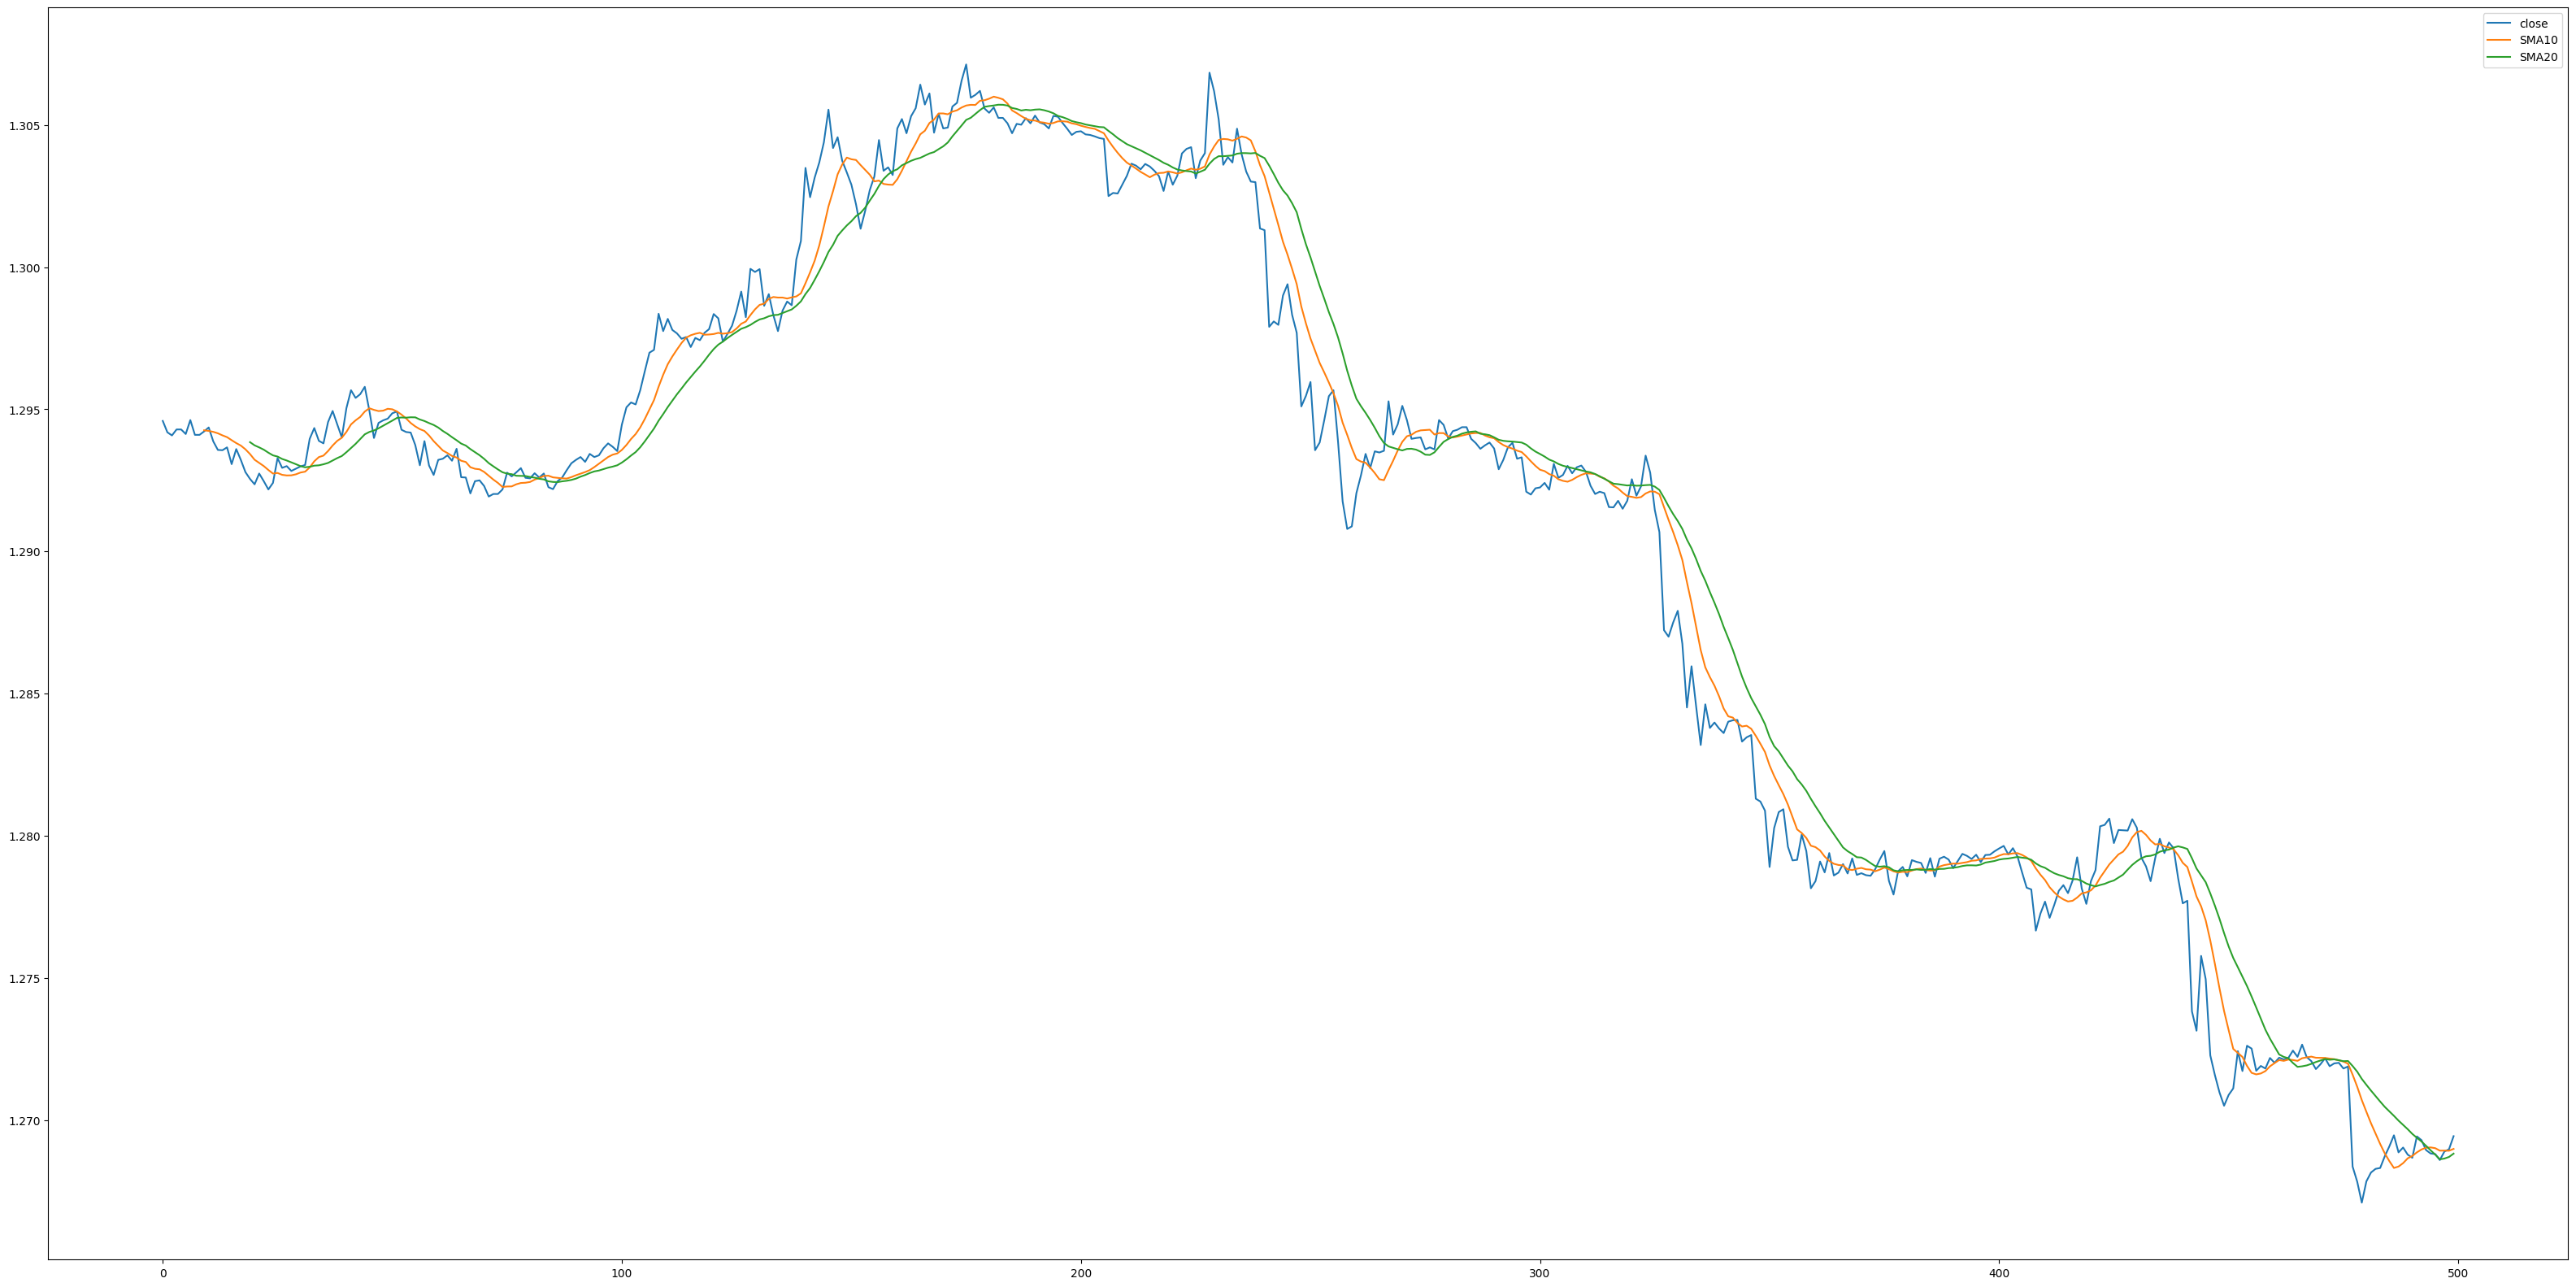

In [23]:
df[['close','SMA10','SMA20']].head(500).plot(figsize=(40,20))
plt.show()

In [24]:
df['Signal'] = df.apply(lambda x: 1 if )

In [25]:
df

,time,open,high,low,close,tick_volume,spread,real_volume,SMA10,SMA20,Signal
0,2012-01-02 00:00:00,1.29443,1.29484,1.29432,1.29459,223,20,0,NaN,NaN,1
1,2012-01-02 00:15:00,1.29460,1.29525,1.29419,1.29419,346,19,0,NaN,NaN,1
2,2012-01-02 00:30:00,1.29406,1.29488,1.29402,1.29408,342,21,0,NaN,NaN,1
3,2012-01-02 00:45:00,1.29408,1.29453,1.29368,1.29429,304,24,0,NaN,NaN,1
4,2012-01-02 01:00:00,1.29434,1.29461,1.29405,1.29429,242,20,0,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...
247037,2021-12-30 23:00:00,1.13194,1.13270,1.13194,1.13260,212,0,0,1.131885,1.131692,1
247038,2021-12-30 23:15:00,1.13260,1.13275,1.13259,1.13269,82,0,0,1.132094,1.131702,1
247039,2021-12-30 23:30:00,1.13270,1.13276,1.13240,1.13250,117,0,0,1.132256,1.131715,1
247040,2021-12-30 23:45:00,1.13250,1.13259,1.13246,1.13257,116,0,0,1.132382,1.131760,1
